In [1]:
#Importing required libraries
import torch
import numpy
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader

In [2]:
#Data for delta rule
data={"inputs":[[5,2,4],[3,3,3],[0,5,1],[2,1,2]],
            "targets":[1250,900,350,550],
            "lr":[1/70,1/12,1/27,2/20],
           "test_inputs":[[6,1,3],[2,2,1],[4,5,0]],
           "test_targets":[1250,500,850]}
weights=[50,50,50]

In [3]:
#Linear model that we are using in our code
def our_model(x,w):
    out=torch.dot(x,w)
    return out

Updated weights= tensor([134.,  52., 114.])
loss= [tensor(37000.), tensor(11800.), tensor(5133.3335), tensor(1938.6666)]


Text(0, 0.5, 'Loss')

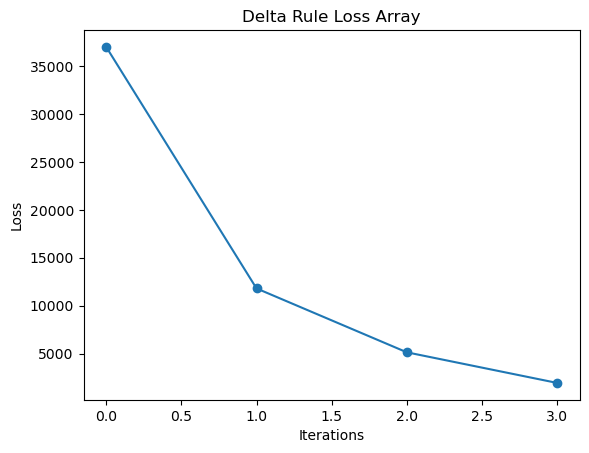

In [4]:
#Implementation of delta rule
def delta_rule(model,data,weights):
  ## your code is here
    total_loss=[]
    w=torch.FloatTensor(weights)
    inputs=data["inputs"]
    targets=data["targets"]
    lr=data["lr"]
    test_inputs=data["test_inputs"]
    test_targets=data["test_targets"]
    for inputs,targets,lr in zip(inputs,targets,lr):
        x=torch.FloatTensor(inputs)
        y=model(x,w)
        error=targets-y
        w+=x*error*lr
        loss=0
        for test_i,test_t in zip(test_inputs,test_targets):
            x=torch.FloatTensor(test_i)
            y=model(x,w)
            loss+=(test_t-y)**2
        total_loss.append(loss/len(test_targets))
    return(w,total_loss)
delta=delta_rule(our_model,data,weights)

  ## return the loss array of each iterations/epochs
print("Updated weights=",delta[0])
print("loss=",delta[1])

  ## plot you figure of loss changes after training
plt.plot(delta[1],'-o')
plt.title("Delta Rule Loss Array")
plt.xlabel("Iterations")
plt.ylabel("Loss")

In [5]:
#Data for batch delta rule
batch_data={"inputs":[[5,2,4],[3,3,3],[0,5,1],[2,1,2],[1,0,5],[4,2,1],[6,1,1],[2,3,4],[7,3,0],[4,4,2],[1,5,7],[5,1,3]],
            "targets":[1250,900,350,550,650,800,1050,850,1200,1000,1100,1100],
           "test_inputs":[[6,1,3],[2,2,1],[4,5,0]],
           "test_targets":[1250,500,850]}
weights=[50,50,50]

Updated weights= tensor([145.4356,  63.2601,  93.3000])
loss= [tensor(31772.5684), tensor(9382.4355), tensor(5793.1567), tensor(4408.5610), tensor(3499.1350), tensor(2807.9167), tensor(2263.2188), tensor(1828.5474), tensor(1479.4471), tensor(1197.9618)]


Text(0, 0.5, 'Loss')

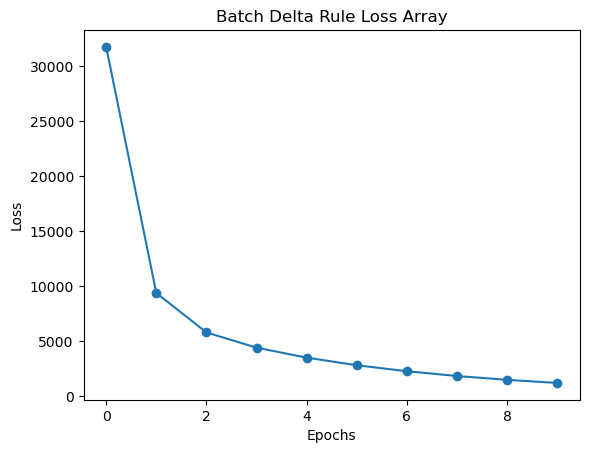

In [6]:
#Implementing the batch delta rule
def batch_delta_rule(model,data,weights):
  ## your code is here
    total_loss=[]
    w=torch.FloatTensor(weights)
    lr=1/100
    test_inputs=data["test_inputs"]
    test_targets=data["test_targets"]
    size=len(data["targets"])
    
    #Iterating over 10 epochs 
    for epochs in range(10):
        
        #Splitting data into batches of 3
        for i in range(0,size,3):
            inputs=data["inputs"][i:i+3]
            targets=data["targets"][i:i+3]
#             print(inputs,targets)
            batch_error=0
            for inputs,targets in zip(inputs,targets):
                x=torch.FloatTensor(inputs)
                y=model(x,w)
                error=targets-y
                batch_error+=(error)*x
            w+=lr*batch_error/3
            loss=0
#             print(inputs)
        for test_i,test_t in zip(test_inputs,test_targets):
            x=torch.FloatTensor(test_i)
            y=model(x,w)
            loss+=(test_t-y)**2
#             print(loss)
        total_loss.append(loss/len(test_targets))
    return(w,total_loss)
batch_delta=batch_delta_rule(our_model,batch_data,weights)
# print(batch_data)
  ## return the loss array of each iterations/epochs
print("Updated weights=",batch_delta[0])
print("loss=",batch_delta[1])

  ## plot you figure of loss changes after training
plt.plot(batch_delta[1],'-o')
plt.title("Batch Delta Rule Loss Array")
plt.xlabel("Epochs")
plt.ylabel("Loss")